# Identifying age-associated differences between Young and Aged Plvap+ve cardiac endothelial cells 



In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import scipy.stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
# Read in the gene expression data of Plvap positive cells
Plvap_Matrix = pd.read_csv('GeneExpressionMatrix.csv')

In [3]:
# Inspect data
Plvap_Matrix.head()

,Unnamed: 0,Genes,Cell_30,Cell_33,Cell_72,Cell_74,Cell_85,Cell_120,Cell_137,Cell_149,...,Cell_11411,Cell_11461,Cell_11591,Cell_11601,Cell_11651,Cell_11681,Cell_11731,Cell_11751,Cell_11781,Cell_11831
0,Sox17,Sox17,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Mrpl15,Mrpl15,0.0,1.240577,0.00000,1.380993,0.0,0.000000,0.0,0.0,...,0.0,2.728255,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,Lypla1,Lypla1,0.0,0.000000,0.00000,0.000000,0.0,1.618783,0.0,0.0,...,0.0,0.000000,2.263916,2.062821,0.0,0.0,0.0,0.0,0.0,0.0
3,Tcea1,Tcea1,0.0,0.000000,1.34403,0.000000,0.0,1.618783,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,Atp6v1h,Atp6v1h,0.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# To make cells as rows and genes as columns, transpose data
Plvap_Matrix_T = Plvap_Matrix.T

In [5]:
# Inspect data
Plvap_Matrix_T.head()

,0,1,2,3,4,5,6,7,8,9,...,13825,13826,13827,13828,13829,13830,13831,13832,13833,13834
Unnamed: 0,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Tmlhe,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Tmlhe,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
Cell_30,0,0,0,0,0,0,0,0,1.15378,0,...,0,0,0,0,0,0,0,1.67528,0,0
Cell_33,0,1.24058,0,0,0,0,0,1.24058,1.24058,0,...,0,0,0,0,0,0,0,0,0,1.24058
Cell_72,0,0,0,1.34403,0,1.34403,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Remove the extra row of gene names
Plvap_Matrix_T1=Plvap_Matrix_T[1:]

In [7]:
# Inspect data
Plvap_Matrix_T1.head()

,0,1,2,3,4,5,6,7,8,9,...,13825,13826,13827,13828,13829,13830,13831,13832,13833,13834
Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Tmlhe,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
Cell_30,0,0,0,0,0,0,0,0,1.15378,0,...,0,0,0,0,0,0,0,1.67528,0,0
Cell_33,0,1.24058,0,0,0,0,0,1.24058,1.24058,0,...,0,0,0,0,0,0,0,0,0,1.24058
Cell_72,0,0,0,1.34403,0,1.34403,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cell_74,0,1.38099,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Promote the Genes row as column headers
Plvap_Matrix_T1.columns = Plvap_Matrix_T1.iloc[0]

In [9]:
# Inspect data
Plvap_Matrix_T1.head()

Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Tmlhe,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Tmlhe,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
Cell_30,0,0,0,0,0,0,0,0,1.15378,0,...,0,0,0,0,0,0,0,1.67528,0,0
Cell_33,0,1.24058,0,0,0,0,0,1.24058,1.24058,0,...,0,0,0,0,0,0,0,0,0,1.24058
Cell_72,0,0,0,1.34403,0,1.34403,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cell_74,0,1.38099,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Remove extra row of Gene names
Plvap_Matrix_T2=Plvap_Matrix_T1[1:]

In [11]:
# Inspect data
Plvap_Matrix_T2.head()

Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Tmlhe,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1
Cell_30,0,0,0,0,0,0,0,0,1.15378,0,...,0,0,0,0,0,0,0,1.67528,0,0
Cell_33,0,1.24058,0,0,0,0,0,1.24058,1.24058,0,...,0,0,0,0,0,0,0,0,0,1.24058
Cell_72,0,0,0,1.34403,0,1.34403,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cell_74,0,1.38099,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cell_85,0,0,0,0,0,0,0,1.42541,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Read in Annotation. This contains the labels of each cells. Each cell can either be Young or Old
Annotation= pd.read_csv('GroupAnnotation5_clusters.csv')

In [13]:
Annotation.head()

,Unnamed: 0,CellType
0,Cell_30,Young
1,Cell_33,Young
2,Cell_72,Young
3,Cell_74,Young
4,Cell_85,Young


In [14]:
# Add this annotation as a new column CellType in the data
Plvap_Matrix_T2['CellType'] = Annotation.CellType.values

/Users/emechebe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Inspect to make sure new column CellType has been added
Plvap_Matrix_T2.head()

Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1,CellType
Cell_30,0,0,0,0,0,0,0,0,1.15378,0,...,0,0,0,0,0,0,1.67528,0,0,Young
Cell_33,0,1.24058,0,0,0,0,0,1.24058,1.24058,0,...,0,0,0,0,0,0,0,0,1.24058,Young
Cell_72,0,0,0,1.34403,0,1.34403,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Young
Cell_74,0,1.38099,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Young
Cell_85,0,0,0,0,0,0,0,1.42541,0,0,...,0,0,0,0,0,0,0,0,0,Young


In [16]:
# Inspect to confirm that the last cells are annotated as Old
Plvap_Matrix_T2.tail()

Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1,CellType
Cell_11681,0,0,0,0,0,2.34677,0,0,0,0,...,0,0,0,0,0,0,2.34677,0,0,Old
Cell_11731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old
Cell_11751,0,0,0,0,0,0,0,1.82154,0,0,...,0,0,0,0,0,0,0,0,0,Old
Cell_11781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old
Cell_11831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old


In [17]:
# The data set now gives us the ability to split it into 2 depending on the CellType columns

# Get Young Plvap cells
Young_Plvap = Plvap_Matrix_T2[Plvap_Matrix_T2.CellType=='Young']

In [18]:
# Confirm 
Young_Plvap.tail()

Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1,CellType
Cell_3130,0,0,1.50005,0,0,1.50005,0,2.43761,0,0,...,0,0,0,0,0,0,1.50005,0,0,Young
Cell_3142,0,0,0,0,0,1.25509,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Young
Cell_3146,0,1.41141,0,0,0.936434,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Young
Cell_3147,0,0,0,0,2.26934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Young
Cell_3149,0,0,0,0,0,0,0,1.43582,1.43582,0,...,0,0,0,0,0,0,0,2.00231,0,Young


In [19]:
# How many cells were Young?
Young_Plvap.shape

(184, 13836)

In [20]:
# Remove the label column
Young_Plvap1=Young_Plvap.drop(['CellType'], axis=1)

In [21]:
Young_Plvap1.shape

(184, 13835)

In [22]:
# Save the GeneNames as a list. We will use this later
GeneNames = Young_Plvap1.columns

In [23]:
GeneNames

Index([u'Sox17', u'Mrpl15', u'Lypla1', u'Tcea1', u'Atp6v1h', u'Rb1cc1',
       u'4732440D04Rik', u'Pcmtd1', u'Rrs1', u'Mybl1',
       ...
       u'Tmlhe', u'Ccl21b.1', u'AC132444.1', u'Csprs', u'AC125149.3',
       u'AC168977.2', u'AC168977.1', u'PISD', u'DHRSX', u'CAAA01147332.1'],
      dtype='object', name=u'Genes', length=13835)

In [24]:
# Now get the Old cells
Old_Plvap = Plvap_Matrix_T2[Plvap_Matrix_T2.CellType=='Old']

In [25]:
Old_Plvap.head()

Genes,Sox17,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Rrs1,Mybl1,...,Ccl21b.1,AC132444.1,Csprs,AC125149.3,AC168977.2,AC168977.1,PISD,DHRSX,CAAA01147332.1,CellType
Cell_3166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old
Cell_4100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old
Cell_5100,0,1.0368,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.53479,1.0368,0,Old
Cell_7100,0,0,0,1.94986,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old
Cell_18100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Old


In [26]:
# How many Old cells?
Old_Plvap.shape

(257, 13836)

In [27]:
# Remove the label column
Old_Plvap1=Old_Plvap.drop(['CellType'], axis=1)

In [28]:
Old_Plvap1.shape

(257, 13835)

In [29]:
# Transpose the data back to original shape
Young_Plvap_T=Young_Plvap1.T
Old_Plvap_T=Old_Plvap1.T

In [30]:
# Summarize: There are 184 cells for young and 257 cells for old

In [31]:
# Script that will take the dataset and randomly group the cells into 5 clusters

In [32]:
#Young_Plvap1.head()

In [33]:
#Sample1 = Young_Plvap1.sample(50,replace=False)

In [34]:
#Sample1.head()

In [35]:
# This function takes a dataframe of single cell gene expression matrix (with columns as genes and
# and rows as Cells) and returns random samplings of the dataframe in a dictionary. I call this function sampler.
# Parameters of sampler include:
     # data ===> Single cell gene expression matrix (Cells by Genes)
     # number_of_samples ===> Number of samples to be returned
     # number_to_sample ====> Number of cells in each sample
     # SampleName ====> Prefix to be attached to each sample

def sampler(data,number_of_samples,number_to_sample,SampleName):
    # Initiate new dictionary where to save the samples
    dictionary_of_data = {}
    # Loop through the number of samples that is to be returned
    for i in range(number_of_samples):
        # For each, obtain a random sampling of the data (with size number_to_sample) without replacement
        Sampling= data.sample(number_to_sample,replace=False)
        # Insert the sampled data into the dictionary and name the sample sequentially with the
        # sample name as the prefix to the sequence
        dictionary_of_data[SampleName+str(i+1)] = Sampling
    # Return the dictionary
    return dictionary_of_data
        
        

In [51]:
# Test run the sampler function
# Calling sampler on the Young_Plvap dataset to create 5 instances of the data by random 
# sampling with each instance of the data containing 2 cells 
test_Young=sampler(Young_Plvap1,5,2,'YoungSample')

In [37]:
#test

In [38]:
# That returned back a dictionary that has 5 key:value pair where each key is sample from the data set
# and the values are 2 randomly selected cells from the dataset 

In [39]:
# Now that we have split the data into samples using the sampler. 
# The next function will iterate through the samples created and compute a reference bulk data expression
# using the cells in each sample. The function computes the mean of the gene across all cells in each sample
# and this is designated as the reference sample. 
# I call this function CreateReferenceSamples and parameter is:
      # dictionary : A dictionary containing instances of data sampled from a gene expression matrix
      # with each instance containing N number of cells with thier gene expression 

In [56]:
# This function takes as input a dictionary containing N instances of single cell data
# (where Key is the id and the value are the expression values of genes in each of the sample that was 
# subsampled from the main data) and collapses all the samples in each instance of the data into one reference
# sample. This is done by taking the mean expression of genes across all the samples in each instance of the data
# The output of this function is a dataframe that contains 


def CreateReferenceSamplesMean(dictionary):
        Data = []
        SampleNames = []
        for key,value in dictionary.items():
              # Data has Genes as columns with cells as Rows.
              # Transpose so that Genes are rows with cells as columns
              New=value.T
              # Now get the mean expression of each gene across all samples
              New1=New.mean(axis=1)
              # Append that to list
              Data.append(list(New1))
              # Accumulate the sample names
              SampleNames.append(key)
        df = pd.DataFrame(Data)
        # Add back gene names
        df.columns = GeneNames
        # Transpose the dataframe
        df_T = df.T
        # Add SampleNames to dataframe
        df_T.columns = SampleNames
        return df_T
     

In [57]:
def CreateReferenceSamplesMedian(dictionary):
        Data = []
        SampleNames = []
        for key,value in dictionary.items():
              # Data has Genes as columns with cells as Rows.
              # Transpose so that Genes are rows with cells as columns
              New=value.T
              # Now get the mean expression of each gene across all samples
              New1=New.median(axis=1)
              # Append that to list
              Data.append(list(New1))
              # Accumulate the sample names
              SampleNames.append(key)
        df = pd.DataFrame(Data)
        # Add back gene names
        df.columns = GeneNames
        # Transpose the dataframe
        df_T = df.T
        # Add SampleNames to dataframe
        df_T.columns = SampleNames
        return df_T

In [58]:
# Use the function to create reference sample from the test dictionary derived from sampler
Young_Data=CreateReferenceSamplesMedian(test_Young)

In [59]:
Young_Data.head()

,YoungSample4,YoungSample5,YoungSample2,YoungSample3,YoungSample1
Genes,,,,,
Sox17,0.000000,0.000000,0.000000,0.000000,0.0
Mrpl15,0.000000,0.000000,0.000000,0.907741,0.0
Lypla1,0.000000,0.616817,0.000000,0.000000,0.0
Tcea1,0.663956,0.616817,0.814295,0.636565,0.0
Atp6v1h,0.000000,0.568483,0.000000,0.000000,0.0


In [60]:
# Now lets do the same to get reference data for the Old Plvap cells

# Get 5 instances of Old Plvap Cells by random sampling
test_Old=sampler(Old_Plvap1,5,2,'OldSample')
# Get the Reference data 
Old_Data=CreateReferenceSamplesMedian(test_Old)
# Inspect
Old_Data.head()

,OldSample5,OldSample4,OldSample1,OldSample3,OldSample2
Genes,,,,,
Sox17,0.0,0.0,0.0,0.0,1.372225
Mrpl15,0.0,0.0,0.0,0.0,0.000000
Lypla1,0.0,0.0,0.0,0.0,0.000000
Tcea1,0.0,0.0,0.0,0.0,0.000000
Atp6v1h,0.0,0.0,0.0,0.0,0.000000


In [55]:
# Now that we can generate samples of data and create reference data from the samples
# we can use this to create reference data sets from Young and Old. And once we get these,
# we then apply a t test to get the genes that are different between the Young and Old population

# To do this, I wrapped up all the functions in a function called runTest and the parameters are:
# 1) data1 ===> A gene expression matrix
# 2) data2 ===> Another gene expression matrix
# 3) number_of_samples ===> Number of samples to be returned
# 4) number_to_sample ====> Number of cells in each sample
# 5) SampleName ====> Prefix to be attached to each sample

# This function will take 2 single cell gene expression data set , create a specified number of reference data samples
# then perform a ttest on the reference data from the two single cell gene expression and report
# the genes that are statistically different. 

In [61]:
def runTest (data1,data2,number_of_samples,number_to_sample,SampleName1,SampleName2):
        dictionary_dataY=sampler(Young_Plvap1,number_of_samples,number_to_sample,'YoungSample')
        Young_Data1=CreateReferenceSamplesMedian(dictionary_dataY)
        dictionary_dataO=sampler(Old_Plvap1,number_of_samples,number_to_sample,'OldSample')
        Old_Data1=CreateReferenceSamplesMedian(dictionary_dataO)
        t,p=scipy.stats.ttest_ind(Young_Data1,Old_Data1,axis=1)
        # Correct p_values for multiple testing using B & H 
        # Adj_p=multipletests(p,alpha=0.05,method='fdr_bh',is_sorted=False,returnsorted=False)
        # Could not use the above call since the corrected values will all be nans if there is even
        # one nan in the uncorrected p_value
        # To get around that, get all the positions with real values in the p array as True
        mask = np.isfinite(p)
        # Create an empty array with the same shape as the original p_value array
        Adj_p = np.empty(p.shape)
        # Fill the empty array with Nans
        Adj_p.fill(np.nan)
        # Use that mask to only test in places with actual values and return the second array
        # which contains the corrected p_values
        Adj_p[mask] = multipletests(p[mask],alpha=0.05,method='fdr_bh')[1]
        # Create a dataframe that contains Genes and the p_values
        P_values=pd.DataFrame(p,list(Transposed_Young.index),columns=['p_values'])
        P_values1=pd.DataFrame(Adj_p,list(Transposed_Young.index),columns=['Adj_p_values'])
        #P_values['Adj_p'] = P_values1.Adj_p_values
        # Subset genes with p_values less than 0.01
        Significant=P_values[P_values.p_values<0.01]
        #return dictionary_dataY,dictionary_dataO
        return P_values,Significant,P_values1

In [64]:
# Transpose the data for the test
Transposed_Young = Young_Data
Transposed_Old = Old_Data
#t,p=scipy.stats.ttest_ind(Transposed_Young,Transposed_Old,axis=1)
#Adj_p=multipletests(p,alpha=0.05,method='fdr_bh',is_sorted=False,returnsorted=False)
# Create a dataframe that contains Genes and the p_values
#P_values=pd.DataFrame(p,list(Transposed_Young.index),columns=['p_values'])
#P_values1=pd.DataFrame(Adj_p[1],list(Transposed_Young.index),columns=['Adj_P'])
#%matplotlib inline
#P_values1.Adj_P.hist()
#Adj_p[1]

In [45]:
#def runT (data1,data2,number_of_samples,number_to_sample,SampleName1,SampleName2):
        #dictionary_dataY=sampler(Young_Plvap1,number_of_samples,number_to_sample,'YoungSample')
        #Young_Data1=CreateReferenceSamples(dictionary_dataY)
        #dictionary_dataO=sampler(Old_Plvap1,number_of_samples,number_to_sample,'OldSample')
        #Old_Data1=CreateReferenceSamples(dictionary_dataO)
        #t,p=scipy.stats.ttest_ind(Young_Data1,Old_Data1,axis=1)
        # Create a dataframe that contains Genes and the p_values
        #P_values=pd.DataFrame(p,list(Transposed_Young.index),columns=['p_values'])
        # Subset genes with p_values less than 0.01
        #Significant=P_values[P_values.p_values<0.01]
        #return dictionary_dataY,dictionary_dataO
        #return P_values,Significant

In [68]:
#for i in range(2):
def runT (data1,data2,number_of_samples,number_to_sample,SampleName1,SampleName2):
        dictionary_dataY=sampler(Young_Plvap1,number_of_samples,number_to_sample,'YoungSample')
        Young_Data1=CreateReferenceSamplesMean(dictionary_dataY)
        dictionary_dataO=sampler(Old_Plvap1,number_of_samples,number_to_sample,'OldSample')
        Old_Data1=CreateReferenceSamplesMean(dictionary_dataO)
        t,p=scipy.stats.ttest_ind(Young_Data1,Old_Data1,axis=1)
        # Correct p_values for multiple testing using B & H 
        # Adj_p=multipletests(p,alpha=0.05,method='fdr_bh',is_sorted=False,returnsorted=False)
        # Could not use the above call since the corrected values will all be nans if there is even
        # one nan in the uncorrected p_value
        # To get around that, get all the positions with real values in the p array as True
        mask = np.isfinite(p)
        # Create an empty array with the same shape as the original p_value array
        Adj_p = np.empty(p.shape)
        # Fill the empty array with Nans
        Adj_p.fill(np.nan)
        # Use that mask to only test in places with actual values and return the second array
        # which contains the corrected p_values
        Adj_p[mask] = multipletests(p[mask],alpha=0.05,method='fdr_bh')[1]
        # Create a dataframe that contains Genes and the p_values
        P_values=pd.DataFrame(p,list(Transposed_Young.index),columns=['p_values'])
        P_values1=pd.DataFrame(Adj_p,list(Transposed_Young.index),columns=['Adj_p_values'])
        #P_values['Adj_p'] = P_values1.Adj_p_values
        # Subset genes with p_values less than 0.01
        Significant=P_values[P_values.p_values<0.01]
        #return dictionary_dataY,dictionary_dataO
        return P_values,Significant,P_values1

In [82]:
df_ = pd.DataFrame(index=GeneNames)
for i in range(100):
    P_values,Significant,P_values1=runT(Young_Plvap1,Old_Plvap1,10,60,'YoungSample','OldSample')
    df_['Run'+str(i)] = P_values
    #print P_values.head()
# Make a copy
df_copy = df_.copy()
#df_['Avg_p_values'] = df_.mean(axis=1)
df_['Median_p_values'] = df_.median(axis=1)
df_copy['Avg_p_values'] = df_copy.mean(axis=1)

In [83]:
df_.head()

,Run0,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,...,Run91,Run92,Run93,Run94,Run95,Run96,Run97,Run98,Run99,Median_p_values
Genes,,,,,,,,,,,,,,,,,,,,,
Sox17,7.987181e-07,0.000200,0.002893,2.433181e-03,0.000182,1.637298e-04,3.003720e-03,5.196958e-04,5.433400e-06,1.464735e-04,...,2.545259e-03,8.209012e-05,0.000795,2.983306e-04,0.009504,1.432407e-07,8.334645e-03,9.045749e-04,0.002234,6.468583e-04
Mrpl15,2.512033e-05,0.002919,0.000060,5.910782e-03,0.018481,7.928338e-04,1.678434e-05,9.937099e-03,5.104220e-05,4.340338e-03,...,1.612388e-04,3.163467e-03,0.003075,1.338373e-02,0.010881,1.890455e-03,7.955197e-06,6.664777e-05,0.000010,1.243919e-03
Lypla1,1.071471e-04,0.000006,0.000162,2.031836e-03,0.000072,4.772993e-03,1.094452e-04,1.663622e-06,2.320758e-04,9.407582e-04,...,6.412893e-02,2.487237e-04,0.000002,4.481641e-02,0.000167,2.801828e-04,1.052434e-06,6.188098e-04,0.000050,7.494460e-04
Tcea1,3.516631e-03,0.001533,0.000100,2.253620e-02,0.003262,1.320406e-03,7.706936e-04,1.023616e-04,1.733812e-03,6.196778e-05,...,2.977577e-03,4.150604e-03,0.000030,3.152817e-04,0.000031,1.374492e-05,2.247176e-08,6.517799e-03,0.032127,6.308120e-04
Atp6v1h,2.317934e-07,0.000003,0.000002,1.749090e-09,0.000008,1.034148e-09,7.973777e-08,7.524330e-09,4.870112e-07,3.472320e-08,...,3.577151e-08,1.329210e-07,0.000004,1.929484e-09,0.000002,2.692780e-06,1.825048e-07,5.448418e-08,0.000003,1.737738e-07


In [84]:
df_copy.head()

,Run0,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,...,Run91,Run92,Run93,Run94,Run95,Run96,Run97,Run98,Run99,Avg_p_values
Genes,,,,,,,,,,,,,,,,,,,,,
Sox17,7.987181e-07,0.000200,0.002893,2.433181e-03,0.000182,1.637298e-04,3.003720e-03,5.196958e-04,5.433400e-06,1.464735e-04,...,2.545259e-03,8.209012e-05,0.000795,2.983306e-04,0.009504,1.432407e-07,8.334645e-03,9.045749e-04,0.002234,0.007655
Mrpl15,2.512033e-05,0.002919,0.000060,5.910782e-03,0.018481,7.928338e-04,1.678434e-05,9.937099e-03,5.104220e-05,4.340338e-03,...,1.612388e-04,3.163467e-03,0.003075,1.338373e-02,0.010881,1.890455e-03,7.955197e-06,6.664777e-05,0.000010,0.010241
Lypla1,1.071471e-04,0.000006,0.000162,2.031836e-03,0.000072,4.772993e-03,1.094452e-04,1.663622e-06,2.320758e-04,9.407582e-04,...,6.412893e-02,2.487237e-04,0.000002,4.481641e-02,0.000167,2.801828e-04,1.052434e-06,6.188098e-04,0.000050,0.010856
Tcea1,3.516631e-03,0.001533,0.000100,2.253620e-02,0.003262,1.320406e-03,7.706936e-04,1.023616e-04,1.733812e-03,6.196778e-05,...,2.977577e-03,4.150604e-03,0.000030,3.152817e-04,0.000031,1.374492e-05,2.247176e-08,6.517799e-03,0.032127,0.004412
Atp6v1h,2.317934e-07,0.000003,0.000002,1.749090e-09,0.000008,1.034148e-09,7.973777e-08,7.524330e-09,4.870112e-07,3.472320e-08,...,3.577151e-08,1.329210e-07,0.000004,1.929484e-09,0.000002,2.692780e-06,1.825048e-07,5.448418e-08,0.000003,0.000006


In [195]:
P_values1.head()

,Adj_p_values
Sox17,0.217003
Mrpl15,0.087575
Lypla1,0.001380
Tcea1,0.343693
Atp6v1h,0.010328


In [197]:
P_values.head()

,p_values
Sox17,0.125157
Mrpl15,0.037146
Lypla1,0.000064
Tcea1,0.242115
Atp6v1h,0.001882


In [186]:
bigdata.head()

,Adj_p_values,p_values
Sox17,NaN,0.016841
Mrpl15,NaN,0.003681
Lypla1,NaN,0.014362
Tcea1,NaN,0.000749
Atp6v1h,NaN,0.000015


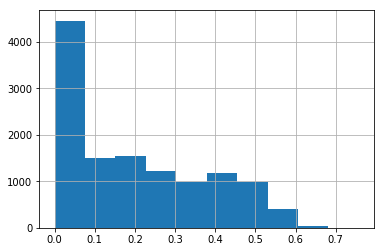

In [97]:
%matplotlib inline
df_.Avg_p_values.hist()

In [85]:
SignMedian=df_[df_.Median_p_values<0.00001]

In [87]:
SignMedian.shape

(1841, 101)

In [88]:
SignMedian.head()

,Run0,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,...,Run91,Run92,Run93,Run94,Run95,Run96,Run97,Run98,Run99,Median_p_values
Genes,,,,,,,,,,,,,,,,,,,,,
Atp6v1h,2.317934e-07,3.128768e-06,0.000002,1.749090e-09,7.556575e-06,1.034148e-09,7.973777e-08,7.524330e-09,4.870112e-07,3.472320e-08,...,3.577151e-08,1.329210e-07,3.746146e-06,1.929484e-09,1.699034e-06,2.692780e-06,1.825048e-07,5.448418e-08,3.353515e-06,1.737738e-07
Vcpip1,1.550927e-06,1.068837e-07,0.000021,1.306858e-06,2.240147e-05,1.794426e-05,1.042324e-07,6.060388e-03,9.180377e-05,2.150519e-05,...,1.007600e-05,6.015890e-05,7.891912e-06,9.028405e-07,1.559098e-05,6.313600e-08,9.286820e-09,7.057914e-06,2.397293e-05,3.945660e-06
Cops5,3.226942e-08,4.390399e-06,0.000001,1.136077e-09,5.520211e-07,8.969490e-07,1.266334e-06,1.393720e-07,2.301374e-08,2.664328e-04,...,7.194409e-09,1.428511e-05,9.267527e-06,3.355836e-08,7.345947e-09,7.600945e-07,9.743801e-06,3.088709e-07,4.722083e-06,4.759893e-07
Arfgef1,4.376529e-06,3.061751e-06,0.000010,8.215725e-04,1.792725e-06,8.423041e-08,1.302307e-05,5.731353e-06,3.630055e-06,5.715179e-08,...,9.830760e-07,7.843707e-08,4.727901e-07,3.101324e-08,1.583787e-06,1.010613e-08,4.047518e-09,2.374904e-07,1.908274e-07,4.541643e-07
Rpl7,2.196531e-06,8.238020e-07,0.000001,2.269285e-07,2.212984e-06,4.976705e-08,7.277623e-08,1.554297e-05,8.075587e-05,8.774495e-07,...,3.897272e-07,8.386437e-06,3.476155e-07,9.152934e-06,1.938617e-08,3.022640e-08,3.376140e-06,2.115455e-06,4.426559e-04,9.715534e-07


In [89]:
SignMean=df_copy[df_copy.Avg_p_values<0.00001]

In [90]:
SignMean.shape

(889, 101)

In [91]:
# Write to csv
SignMean.to_csv('SignificantMean.csv')

In [92]:
SignMedian.to_csv('SignificantMedian.csv')

In [76]:
df_.head()

,Run0,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,...,Run11,Run12,Run13,Run14,Run15,Run16,Run17,Run18,Run19,Avg_p_values
Genes,,,,,,,,,,,,,,,,,,,,,
Sox17,0.104956,0.001175,0.061377,0.065134,0.010218,0.044246,0.008291,0.216520,0.024481,0.240013,...,0.082628,0.005292,0.006759,0.040580,0.005364,0.110172,0.003349,0.002542,0.002188,0.052697
Mrpl15,0.000867,0.135353,0.064051,0.119783,0.021382,0.011886,0.133701,0.005239,0.011603,0.099935,...,0.041764,0.003994,0.059310,0.162922,0.000493,0.003521,0.084932,0.007190,0.163484,0.061129
Lypla1,0.001771,0.116265,0.001176,0.037947,0.007299,0.003078,0.005595,0.010718,0.608910,0.365109,...,0.004900,0.034779,0.012167,0.017241,0.562077,0.028430,0.000496,0.006482,0.000288,0.096953
Tcea1,0.027892,0.023777,0.198651,0.002686,0.030102,0.939193,0.002674,0.010997,0.004166,0.035727,...,0.047584,0.013804,0.034249,0.156226,0.001452,0.033089,0.041561,0.071650,0.026003,0.089374
Atp6v1h,0.000010,0.001185,0.002534,0.000581,0.000338,0.004304,0.000976,0.000919,0.000075,0.002836,...,0.000246,0.000423,0.000727,0.009130,0.000072,0.000773,0.000681,0.000052,0.000888,0.001348


In [102]:
p

array([       nan, 0.27641322, 0.15782262, ..., 0.56190093,        nan,
              nan])

In [106]:
New=multipletests(p,alpha=0.05,method='fdr_bh')

In [108]:
New

(array([False, False, False, ..., False, False, False]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 3.7074954321036913e-06,
 3.614022406938923e-06)

In [113]:
# The isfinite function will return true where there is an actual value and return false where there is no
# value. So all real numbers will take a True while Nans will take a false
mask = np.isfinite(p)

In [114]:
mask

array([False,  True,  True, ...,  True, False, False])

In [111]:
# Create an 'empty' array the same size of the p value array
pval_corrected = np.empty(p.shape)

In [112]:
# Initially this will contain random numbers but we want nans
pval_corrected 

array([6.93710796e-310, 0.00000000e+000, 0.00000000e+000, ...,
       1.66289204e-005,             nan, 1.78556241e-001])

In [118]:
# Fill it up with nans
pval_corrected.fill(np.nan) 

In [119]:
pval_corrected

array([nan, nan, nan, ..., nan, nan, nan])

In [130]:
pval_corrected[mask] = multipletests(p[mask],alpha=0.05,method='fdr_bh')[1]

In [131]:
pval_corrected

array([       nan, 0.53620214, 0.53620214, ..., 0.76123299,        nan,
              nan])

In [132]:
len(pval_corrected)

13835

In [133]:
p

array([       nan, 0.27641322, 0.15782262, ..., 0.56190093,        nan,
              nan])